### ***Problem08***
---

In [69]:
### Import library & data set
# library
from google.colab import drive
drive.mount("/content/drive")
import sys
import numpy as np
import pandas as pd
from sklearn.metrics import DistanceMetric
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
import seaborn as sns
import math
# df function
def to_df(df):
  df = pd.read_csv(df)
  df = np.array(df)
  return df
moons = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW02B/moons.csv"
moons = to_df(moons)
moons = moons[:1000]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
### hierarchical clustering (1) scratch (linkage=single)
class Hierarchical_clustering():
  def __init__(self, data, K):
    self.data = data
    self.K = K
    self.clusters = self.init_clusters() # cluster = (index : [data points])

  def distance(self, p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))

  def single_link(self, ci, cj):
    return min([self.distance(vi, vj) for vi in ci for vj in cj])

  def init_clusters(self):
    return {data_idx : [data_point] for data_idx, data_point in enumerate(self.data)}
# bound 2 data points to one cluster as the lowest distnace
  def find_closest_clusters(self):
    min_dist = math.inf
    cloest_clusters = None
    clusters_index = list(self.clusters.keys())
    # compare each two pair of clusters
    for i, cluster_i in enumerate(clusters_index[:-1]):
      for j, cluster_j in enumerate(clusters_index[i+1:]):
          dist = self.single_link(self.clusters[cluster_i], self.clusters[cluster_j])
          if dist < min_dist:
            min_dist, closest_clusters = dist, (cluster_i, cluster_j)
    return closest_clusters
# merge pair of clusters
  def merge_clusters(self, ci_id, cj_id):
    new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}
    # make new clusters
    for cluster_id in self.clusters.keys():
      if (cluster_id == ci_id) | (cluster_id == cj_id):
        continue
      new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
    return new_clusters

  def fit(self):
    while len(self.clusters.keys()) > self.K:
      closest_clusters = self.find_closest_clusters()
      self.clusters = self.merge_clusters(*closest_clusters)

  def print(self):
    idx = []
    val = []
    for id, points in self.clusters.items():
      idx.append(id)
      val.append(points)
      # print("Cluster: {}, Points: {}" .format(id, points) )
    return  val

In [71]:
### implement k=3
model = Hierarchical_clustering(moons, K=3)
model.fit()
result = model.print()

def make_cluster(num, data):
  zero = np.full((len(data),1), num)
  zero = pd.DataFrame(zero, columns=["y"])
  temp = pd.DataFrame(data, columns=["x1" ,"x2"])
  result = pd.concat([temp, zero], axis=1)
  return result

cluster_1 = make_cluster(1, result[0])
cluster_2 = make_cluster(2, result[1])
cluster_3 = make_cluster(3, result[2])
cluster = pd.concat([cluster_1,cluster_2,cluster_3], axis=0)
cluster.head()

,x1,x2,y
0,-1.000749,0.282341,1
1,-1.034728,0.292365,1
2,-0.991395,0.235940,1
3,-0.990677,0.220661,1
4,-1.005495,0.245896,1


In [102]:
(cluster["y"].shape[0])

1000

In [104]:
### evaluate
def gini(num=None):
  return (len(cluster["y"][cluster["y"]==num]) / (cluster["y"].shape[0]))**2
result = 1 - gini(num=0) - gini(num=1) - gini(num=2)
gini(num=1)

0.256036

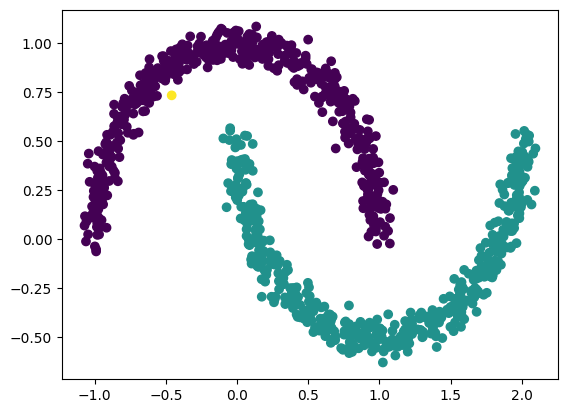

In [88]:
### plot
plt.scatter(cluster["x1"], cluster["x2"], c=cluster["y"])

In [ ]:
### implement k=5
model = Hierarchical_clustering(moons, K=5)
model.fit()
result = model.print()

def make_cluster(num, data):
  zero = np.full((len(data),1), num)
  zero = pd.DataFrame(zero, columns=["y"])
  temp = pd.DataFrame(data, columns=["x1" ,"x2"])
  result = pd.concat([temp, zero], axis=1)
  return result

cluster_1 = make_cluster(1, result[0])
cluster_2 = make_cluster(2, result[1])
cluster_3 = make_cluster(3, result[2])
cluster_4 = make_cluster(3, result[3])
cluster_5 = make_cluster(3, result[4])
cluster = pd.concat([cluster_1,cluster_2,cluster_3,cluster_5,cluster_5], axis=0)

# evaluate
result = 1-gini(0)-gini(1)-gini(2)-gini(3)-gini(4)

In [ ]:
### Plot
plt.scatter(cluster["x1"], cluster["x2"], c=cluster["y"])

In [ ]:
### implement k=5
model = Hierarchical_clustering(moons, K=10)
model.fit()
result = model.print()

def make_cluster(num, data):
  zero = np.full((len(data),1), num)
  zero = pd.DataFrame(zero, columns=["y"])
  temp = pd.DataFrame(data, columns=["x1" ,"x2"])
  result = pd.concat([temp, zero], axis=1)
  return result

cluster_1 = make_cluster(1, result[0])
cluster_2 = make_cluster(2, result[1])
cluster_3 = make_cluster(3, result[2])
cluster_4 = make_cluster(3, result[3])
cluster_5 = make_cluster(3, result[4])
cluster_6 = make_cluster(3, result[5])
cluster_7 = make_cluster(3, result[6])
cluster_8 = make_cluster(3, result[7])
cluster_9 = make_cluster(3, result[8])
cluster_10 = make_cluster(3, result[9])
cluster = pd.concat([cluster_1,cluster_2,cluster_3,cluster_5,cluster_6,cluster_7,
                     cluster_8,cluster_9,cluster_10], axis=0)

# evaluate
result = 1-gini(0)-gini(1)-gini(2)-gini(3)-gini(4)-gini(5)-gini(6)-gini(7)-gini(8)-gini(9)

In [ ]:
### Plot
plt.scatter(cluster["x1"], cluster["x2"], c=cluster["y"])

In [ ]:
### hierarchical clustering (2)
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model.fit_predict(moons)
plt.figure(figsize=(10, 7))
plt.scatter(moons['Xmoons_X1'], moons['Xmoons_X2'], c=model.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


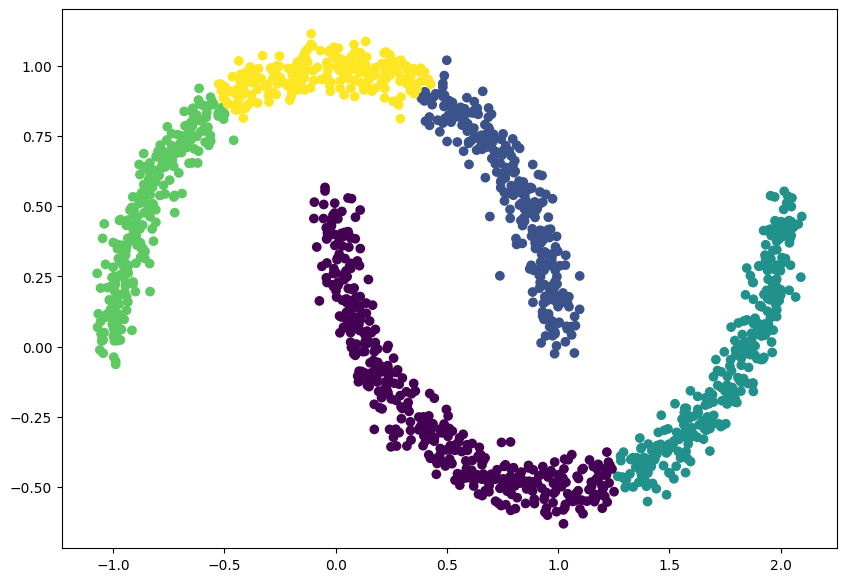

In [ ]:
### hierarchical clustering (5)
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
model.fit_predict(moons)
plt.figure(figsize=(10, 7))
plt.scatter(moons['Xmoons_X1'], moons['Xmoons_X2'], c=model.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


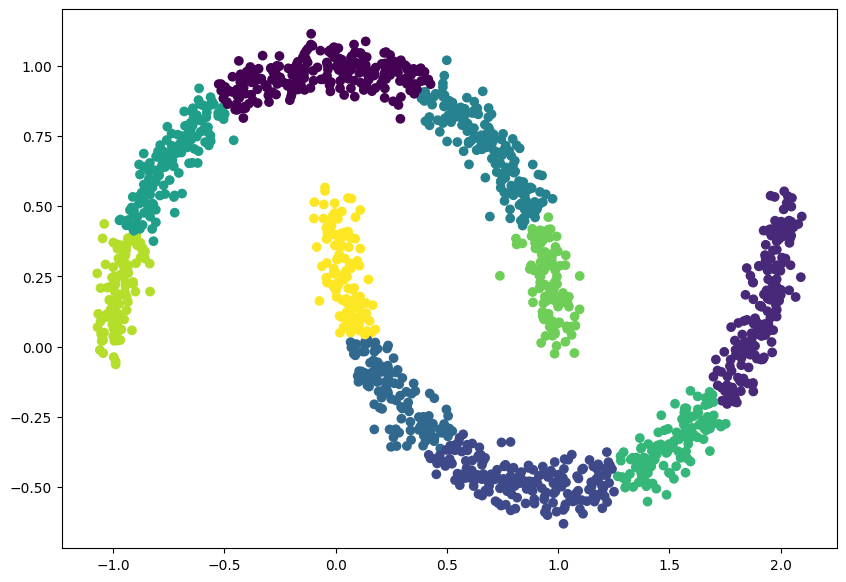

In [ ]:
### hierarchical clustering (10)
model = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')
model.fit_predict(moons)
plt.figure(figsize=(10, 7))
plt.scatter(moons['Xmoons_X1'], moons['Xmoons_X2'], c=model.labels_)